
## Part 0: Prerequisites:




In [ ]:
import sys
# sys.stdout = open("output.txt", "w")

print('Loading/Installing Package => Begin\n\n')
# Commonly used modules
import numpy as np
import os
from os import path, makedirs
import time
from time import time
import subprocess


def install(package):
  print("Installing "+package) 
  subprocess.check_call([sys.executable,"-m" ,"pip", "install", package])
  print("Installed "+package+"\n") 



# Images, plots, display, and visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

#reading/writing into files
# !pip3 install pickle5
install("pickle5")
import pickle5 as pickle

print('\n########################################################################')
print('Checking the running platforms\n')
import platform
running_os=platform.system()
print("OS: "+running_os)
print("OS version: "+platform.release())

try:
  from google.colab import drive
  COLAB = True
except:
  COLAB = False
print("running on Colab: "+str(COLAB))

# if 'google.colab' in str(get_ipython()):
#   print('Running on CoLab')
#   install("google.colab")
#   from google.colab import drive
#   drive.mount('/content/drive')
# else:
#   print('Not running on CoLab')


print("Python version: "+platform.python_version())


dataset_directory_path=''
simulation_directory_path=''

if COLAB == True:
  drive.mount('/content/drive')
  dataset_directory_path='/content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.data/'
  simulation_directory_path=dataset_directory_path+'simulation_results/'
elif 'Linux' in running_os:
  dataset_directory_path='/wsu/home/gy/gy40/gy4065/hm.jetscapeml.data/'
  simulation_directory_path=dataset_directory_path+'simulation_results/'
else:
  dataset_directory_path= 'G:\\My Drive\\Projects\\110_JetscapeMl\\hm.jetscapeml.data\\'
  simulation_directory_path=dataset_directory_path+'simulation_results\\'
print('Dataset Directory Path: '+dataset_directory_path)



if not path.exists(simulation_directory_path):
    makedirs(simulation_directory_path)
print('Simulation Results Path: '+simulation_directory_path)
print('########################################################################\n')


print('\nLoading/Installing Package => End\n\n')

: 

In [ ]:
class DatasetBuilderSingleFileAnalyzer:
   # class attribute
  
    # Instance attribute
    def __init__(self, input_file_name_hadrons,data_size,y_class_label_items,output_dataset_file_name):
        self.input_file_name_hadrons=x_train
        self.data_size=y_train
        self.y_class_label_items=x_test
        self.output_dataset_file_name=y_test

## Part 0: Input Params:

getting inputs parameters from command line

In [ ]:
print('########################################################################\n')
print("Parsing parameters from command line and initializing the input parameters")
# Python program to demonstrate
# command line arguments
 
 
import getopt, sys
 
 
# Remove 1st argument from the
# list of command line arguments
argumentList = sys.argv[1:]
 
# Options
options = "hi:d:y:o:n:c:p:"
 
# Long options
long_options = ["Help", "Input_file_name_hadrons","Data_size","Y_class_label_items","output_dataset_file_name=", "number_of_partition","configuration_directory","configuration_number"]
 
try:
    # Parsing argument
    arguments, values = getopt.getopt(argumentList, options, long_options)
    print(arguments)
    print(values)
    # checking each argument
    for currentArgument, currentValue in arguments:
        print(currentArgument)
        if currentArgument in ("-h", "--Help"):
            print ("Displaying Help")   
        elif currentArgument in ("-i", "--Input_file_name_hadrons"):
            print ("Input_file_name_hadrons: ", currentValue)
            file_name_hadrons=currentValue
            print('simulated events final state hadron file: '+file_name_hadrons)
        elif currentArgument in ("-d", "--Data_size"):
            print ("Data_size: ", currentValue) 
            data_size=int(currentValue)
            print('data_size: {} '.format(data_size))
        elif currentArgument in ("-y", "--Y_class_label_items"):
            print ("Y_class_label_items: ", currentValue)
            y_class_label_items=[currentValue]     
            print("y_class_label_items")
            print(y_class_label_items)
        elif currentArgument in ("-o", "--output_dataset_file_name"):
            print ("output_dataset_file_name: ",currentValue)
            dataset_file_name=currentValue
            print("Dataset file name: "+dataset_file_name)
        elif currentArgument in ("-n", "--number_of_partition"):
            print ("number_of_partition: ",currentValue)
            number_of_partition=int(currentValue)
            print('Number of partition for splitting the events: {} '.format(number_of_partition))
        elif currentArgument in ("-c", "--configuration_directory"):
            print ("configuration_directory: ",currentValue)
            configuration_directory=currentValue
            print('Configuration directory: ',configuration_directory)
        elif currentArgument in ("-p", "--configuration_number"):
            print ("configuration_number: ",currentValue)
            configuration_number=int(currentValue)
            print('Configuration number to reference which dataset it is: {} '.format(configuration_number))
except getopt.error as err:
    # output error, and return with an error code
    print (str(err))
print('########################################################################\n')

Storing/Loading Events Item Chunck Item from File

In [ ]:
def save_event_items_chunk(file_name,event_items_chunks_item):
    with open(file_name, 'wb') as dataset_file:
        pickle.dump(event_items_chunks_item,dataset_file, protocol=pickle.HIGHEST_PROTOCOL)

        
def load__event_items_chunk(file_name):
    with open(file_name, 'rb') as dataset_file:
        event_items = pickle.load(dataset_file, encoding='latin1')
        return event_items

**Converting event items into 32x32 pixel images/2-D Array**
and Plotting sample event histogram image of a jet shower event


<class 'numpy.ndarray'> 1024 (32, 32)
10.0341
20.49299


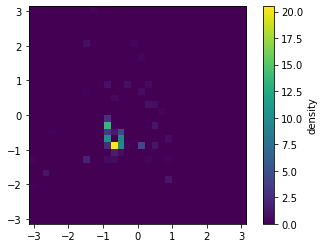

In [ ]:

#input
pi=3.14159
bin_count=32
def convert_event_to_image(bin_count,event_item,draw_plot=False):
    event_v = np.vstack(event_item)
    # print (event_v)
    counts, xedges, yedges = np.histogram2d(event_v[:,0], event_v[:,1], bins=bin_count, weights=event_v[:,2])
    # 
    if draw_plot:
#        plt.imshow(counts, interpolation='nearest', origin='lower',
#            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
        plt.imshow(counts, interpolation='nearest', origin='lower',
            extent=[-pi, pi, -pi, pi])
        cb = plt.colorbar()
        cb.set_label("density")
    #print(counts)
    return counts


# print('\n########################################################################')
# print('Converting event items into 32x32 pixel images/2-D Array and Plotting sample event histogram image of a jet shower event')
# event_item_sample=event_items[0]
# # print(event_item_sample)

# event_item_sample_image=convert_event_to_image(bin_count,event_item_sample,True)
# print(type(event_item_sample_image), event_item_sample_image.size, event_item_sample_image.shape)
# # print(event_item_sample_image)
# print(np.max(event_item_sample))
# print(np.max(event_item_sample_image))
# print('\n########################################################################')

**Converting all events into image data structure**

In [ ]:
import asyncio
image_grid_count=32
# async 
def convert_events_to_images(event_items, image_grid_count=32):
    event_items_image = np.array(np.zeros((1,image_grid_count,image_grid_count)))
    is_first_cell_zero=True
    for event_item in event_items:
        event_item_image=convert_event_to_image(image_grid_count,event_item,False)
        if is_first_cell_zero:
            event_items_image[0]=event_item_image
            is_first_cell_zero=False
        else:
            event_items_image=np.insert(event_items_image,0,event_item_image,axis=0)
    return event_items_image
 


Loading Events Item Chunck Item from File and Convert them to Image Async

In [ ]:
# async
def load_convert_event_items_to_image_items():
  print('\n########################################################################')
  start = time()
  print("Loading Events Item Chunck Item from File and Convert them to Image Async")
  # number_of_partition=20
  number_of_events_per_partition=int( data_size/number_of_partition)
  # event_items_image_chunk_array =np.array(np.zeros((number_of_partition,number_of_events_per_partition,image_grid_count,image_grid_count))) 
  event_items_image = np.array(np.zeros((1,image_grid_count,image_grid_count))) 
  for partition_index in range(number_of_partition):
    print("Partition#",partition_index," Loading Partition ",partition_index, "in the file")

    file_name="config-0"+str(configuration_number)+"-"+y_class_label_items[0]+"-simulationsize"+str(data_size)+"-partition"+str(partition_index)+"-numofevents"+str(number_of_events_per_partition)+".pkl"
    file_name=simulation_directory_path+file_name
    event_items_chunks_item=load__event_items_chunk(file_name)

    # file_name=y_class_label_items[0]+"-simulationsize"+str(data_size)+"-partition"+str(partition_index)+"-numofevents"+str(number_of_events_per_partition)+".pkl"
    # file_name=simulation_directory_path+file_name
    # event_items_chunks_item=load__event_items_chunk(file_name)
    print ("Partition#",partition_index," Loaded: ",file_name)
    print("Partition#",partition_index," event_items_chunks_item type: ", type(event_items_chunks_item))
    print("Partition#",partition_index," event_items_chunks_item content: ", len(event_items_chunks_item))
    
    event_items=event_items_chunks_item

    print('\n########################################################################')
    print("Partition#",partition_index," Converting to Image arrays Begins: ")
    print("Partition#",partition_index,'Converting all events into image data structure')
    event_items_image= convert_events_to_images(event_items)
    
    print("Partition#",partition_index,type(event_items_image), event_items_image.size, event_items_image.shape)  
    # if partition_index==0:
    #     event_items_image_chunk_array[0]=event_items_image
    # else:
    #     event_items_image_chunk_array=np.insert(event_items_image_chunk_array,0,event_items_image,axis=0)
    print("Partition#",partition_index,type(event_items_image), event_items_image.size, event_items_image.shape)
    print("Partition#",partition_index," Converting to Image arrays Ends: ")
    print('\n########################################################################')

    print('\n########################################################################')
    print("Partition#",partition_index," Storing Image Items Chunck into File begins")
    file_name="config-0"+str(configuration_number)+"-"+y_class_label_items[0]+"-simulationsize"+str(data_size)+"-partition"+str(partition_index)+"-numofevents"+str(number_of_events_per_partition)+"-img-chunk.pkl"
    file_name=simulation_directory_path+file_name
    print ("Partition#",partition_index,"Filename: ",file_name,)
    save_event_items_chunk(file_name,event_items_image)
    print ("Partition#",partition_index,"Stored at : ",file_name)
    print("Partition#",partition_index," Storing Image Items Chunck into File ends")
    print('\n########################################################################')
    
    
  else:
    print("Finally loading events items partitioning is done!")
  elapsed = time() - start
  print('Computing / Storing event chunk into Image Chunk Elapsed %.3f seconds.' % elapsed)
  print('\n########################################################################')

load_convert_event_items_to_image_items()

In [ ]:
sys.stdout.close()